## TRANSFORMING GOOGLE SCHOLAR PROFILE INTO TWO REPRESENTATIVE PLOTS 

Download manually the ESI indicators such as Percentiles as the .CSV files by this link:
https://esi.incites.thomsonreuters.com/BaselineAction.action
<img src="Website.png">

In [38]:
# import nessesary modules
import scholarly    # extract information from a Google Scholar
import pandas as pd # manipulate data
from itertools import zip_longest
from pprint import pprint # output data in a more prettier way 
import numpy as np  # perform calculations
import matplotlib.pyplot as plt # plot figures
import difflib # compare strings

In [121]:
# read the data file with the percentiles
df = pd.read_csv("BaselinePercentiles.csv")
# print the list of fields
print('List of fields:')
print(df.iloc[1::7,0])

List of fields:
1                                ALL FIELDS
8                     AGRICULTURAL SCIENCES
15                   BIOLOGY & BIOCHEMISTRY
22                                CHEMISTRY
29                        CLINICAL MEDICINE
36                         COMPUTER SCIENCE
43                     ECONOMICS & BUSINESS
50                              ENGINEERING
57                      ENVIRONMENT/ECOLOGY
64                              GEOSCIENCES
71                               IMMUNOLOGY
78                        MATERIALS SCIENCE
85                              MATHEMATICS
92                             MICROBIOLOGY
99             MOLECULAR BIOLOGY & GENETICS
106                       MULTIDISCIPLINARY
113                 NEUROSCIENCE & BEHAVIOR
120               PHARMACOLOGY & TOXICOLOGY
127                                 PHYSICS
134                  PLANT & ANIMAL SCIENCE
141                   PSYCHIATRY/PSYCHOLOGY
148                SOCIAL SCIENCES, GENERAL
155             

In [183]:
# select the field
field = 'MATERIALS SCIENCE'
print('Selected field: ',field)
field_index = df.loc[df['BASELINES-PERCENTILES'] == field].index[0]
df_field = df.iloc[field_index+1:field_index+7]

# select the years
years_array = (np.asarray(df.loc[df['BASELINES-PERCENTILES'] == 'RESEARCH FIELDS'])[0][1:-1]).astype(int)

# collect citation limits for each persentile and a year
percentiles = {}
for i in range(6):
    percentiles[df_field.iloc[i,0]] = dict(zip_longest(years_array, np.asarray(df_field.iloc[i,1:-1])), fillvalue='')
percentiles['Other'] = dict(zip_longest(years_array, np.zeros(len(years_array))), fillvalue='')

pprint(percentiles)

Selected field:  MATERIALS SCIENCE
{'0.01%': {2008: 3729.0,
           2009: 2493.0,
           2010: 3463.0,
           2011: 1553.0,
           2012: 1469.0,
           2013: 1748.0,
           2014: 1021.0,
           2015: 803.0,
           2016: 483.0,
           2017: 193.0,
           2018: 51.0,
           'fillvalue': ''},
 '0.10%': {2008: 869.0,
           2009: 774.0,
           2010: 955.0,
           2011: 722.0,
           2012: 615.0,
           2013: 494.0,
           2014: 426.0,
           2015: 283.0,
           2016: 177.0,
           2017: 89.0,
           2018: 22.0,
           'fillvalue': ''},
 '1.00%': {2008: 224.0,
           2009: 230.0,
           2010: 243.0,
           2011: 207.0,
           2012: 191.0,
           2013: 160.0,
           2014: 137.0,
           2015: 101.0,
           2016: 69.0,
           2017: 35.0,
           2018: 8.0,
           'fillvalue': ''},
 '10.00%': {2008: 52.0,
            2009: 52.0,
            2010: 52.0,
            20

In [184]:
def is_in_top(publication_year, number_of_citations, percentile):
    try:
        return int(number_of_citations >= percentiles[percentile][publication_year])
    except:
        return 0

def is_top(publication_year, number_of_citations):
    top_percentile = None
    try:
        for percentile in percentiles.keys():
            if number_of_citations >= percentiles[percentile][publication_year]:
                top_percentile = percentile
                break
        return top_percentile
    except:
        return None


In [185]:
# read the data file with the percentiles
df = pd.read_csv('JournalHomeGrid.csv',skiprows=1)
# print the list of fields
journal_impact_factors = df.set_index("Full Journal Title").to_dict()["Journal Impact Factor"]

def get_impact_factor(journal):
    journal = journal.lower()
    impact_factor = None
    for jname in journal_impact_factors.keys():
        if journal == str(jname).lower():
            impact_factor = float(journal_impact_factors[jname])
    return impact_factor

In [186]:
# Retrieve the author's data, fill-in, and print
scholar_name = 'Vladyslav Turlo'
search_query = scholarly.search_author(scholar_name)
author = next(search_query).fill()

In [187]:
# compare list of author names for each publication whith the scholar name to find its place in the list
def get_scholar_name_position(key_author,pub_authors):
    closest_match = difflib.get_close_matches(key_author, pub_authors,1,0)[0]
    if closest_match == pub_authors[0]:
        return('First Author') # first author
    elif closest_match == pub_authors[-1]:
        return('Last Author') # last author'
    else:
        return('Middle Author') # middle author

In [188]:
publications = pd.DataFrame(columns=['Author Position','Journal','Impact Factor','Year','Cited By','In top'])

# Retrieve an important information about each publication
for index in range(len(author.publications)):
    pub = author.publications[index]
    # Extract the number of citations
    try:
        citedby = pub.citedby
    except AttributeError:
        citedby = 0
    # Extract the year of publication
    try:
        year = pub.bib['year']
    except KeyError:
        year = None

    # get more details about this publication    
    pub = author.publications[index].fill()
    
    # Extract the position of scholar in the authors' list
    try:
        author_position = get_scholar_name_position(scholar_name, pub.bib['author'].split(' and '))
    except KeyError:
        author_position = None    

    # Extract the journal title
    try:
        journal = pub.bib['journal']
    except KeyError:
        journal = None   
        
    # Get an impact factor of the journal
    impact_factor = get_impact_factor(journal)
    
    # Add a new line into the publications dataframe
    publications.loc[index] = [author_position, journal, impact_factor, year, citedby, is_top(year,citedby)]

# output publications
publications


,Author Position,Journal,Impact Factor,Year,Cited By,In top
0,First Author,Acta Materialia,6.036,2015,20,20.00%
1,First Author,Acta Materialia,6.036,2016,14,20.00%
2,First Author,Acta Materialia,6.036,2018,8,1.00%
3,First Author,Journal of Applied Physics,2.176,2017,7,20.00%
4,First Author,Modelling and Simulation in Materials Science ...,1.793,2017,6,20.00%
5,First Author,Journal of Alloys and Compounds,3.779,2017,5,50.00%
6,First Author,Philosophical Magazine,1.632,2013,5,Other
7,Middle Author,Journal of Materials Engineering and Performance,1.34,2016,3,Other
8,First Author,Scripta Materialia,4.163,2018,2,20.00%
9,First Author,arXiv preprint arXiv:1809.05201,None,2018,0,Other


In [189]:
# sort table by year of publication
publications = publications.sort_values(['Year']).reset_index(drop=True)
publications

,Author Position,Journal,Impact Factor,Year,Cited By,In top
0,First Author,Philosophical Magazine,1.632,2013,5,Other
1,First Author,Acta Materialia,6.036,2015,20,20.00%
2,First Author,Acta Materialia,6.036,2016,14,20.00%
3,Middle Author,Journal of Materials Engineering and Performance,1.34,2016,3,Other
4,First Author,Journal of Applied Physics,2.176,2017,7,20.00%
5,First Author,Modelling and Simulation in Materials Science ...,1.793,2017,6,20.00%
6,First Author,Journal of Alloys and Compounds,3.779,2017,5,50.00%
7,Middle Author,UKRAINIAN JOURNAL OF PHYSICS,None,2017,0,Other
8,First Author,Acta Materialia,6.036,2018,8,1.00%
9,First Author,Scripta Materialia,4.163,2018,2,20.00%


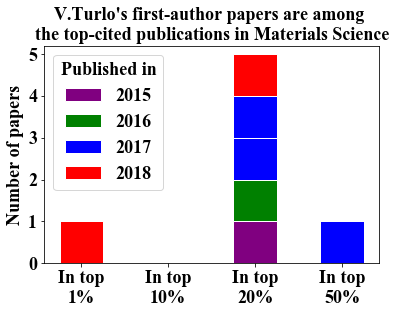

In [318]:
def percentile_to_array(percentile):
    if percentile == '50.00%':
        return np.asarray([0,0,0,1])
    elif percentile == '20.00%':
        return np.asarray([0,0,1,0])
    elif percentile == '10.00%':
        return np.asarray([0,1,0,0])
    elif percentile == '1.00%':
        return np.asarray([1,0,0,0])
    else:
        return np.asarray([0,0,0,0])

def year_to_color(year):
    if year == 2015:
        return 'purple'
    elif year == 2016:
        return 'green'
    elif year == 2017:
        return 'blue'
    elif year == 2018:
        return 'red'
    else:
        return 'white'

ind = np.arange(4)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
bottom = [0,0,0,0]
p0 = plt.bar(ind, bottom, width)

for i in range(len(publications.index)):
    pub = publications.loc[i]
    # select first-author papers already published in 2015-2018  
    if 2015 <= pub['Year'] <= 2018:
        if pub['Author Position'] == 'First Author':
            if pub['Impact Factor'] != None:
                parray = percentile_to_array(pub['In top'])
                plt.bar(ind, parray, width, bottom=bottom, color=year_to_color(pub['Year']), 
                        label=str(pub['Year']), edgecolor='white', linewidth=1)
                bottom += parray
    
plt.ylabel('Number of papers')
plt.title('V.Turlo\'s first-author papers are among \nthe top-cited publications in Materials Science', fontsize = 18)
plt.xticks(ind, ('In top\n1%', 'In top\n10%', 'In top\n20%', 'In top\n50%'))
#plt.yticks(np.arange(0, 81, 10))
plt.ylim(0,5.2)

#remove dublicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)

# show updated legend
plt.legend(newHandles, newLabels, title = 'Published in')  

font = {'family' : 'serif',
        'serif'  : ['Times New Roman'],
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.rcParams['mathtext.default'] = 'regular'

plt.savefig("percentiles.tiff",dpi=600,bbox_inches='tight',transparent=True)

plt.show()

    

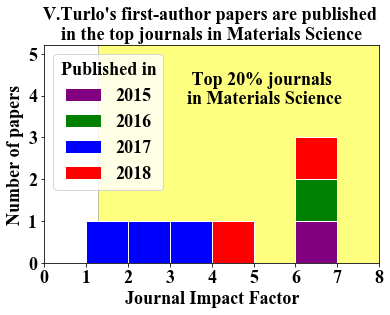

In [322]:
def impact_factor_to_array(impactfactor):
    tmp = np.arange(7)*0
    tmp[int(impactfactor)] = 1
    return tmp

# The highest 51.941 and the lowest 2.956 impact factors for the journals in the top 10% in the field of Materials Science
plt.bar(1.283 + 4, 6, 8, color='yellow', edgecolor='gray', alpha = 0.5)
plt.text(3.4,3.8,' Top 20% journals \nin Materials Science', fontsize=18)


ind = np.arange(7)    # the x locations for the groups
width = 1       # the width of the bars: can also be len(x) sequence
bottom = np.arange(7)*0
p0 = plt.bar(ind, bottom, width)
for i in range(len(publications.index)):
    pub = publications.loc[i]
    # select first-author papers already published in 2015-2018  
    if 2015 <= pub['Year'] <= 2018:
        if pub['Author Position'] == 'First Author':
            if pub['Impact Factor'] != None:
                ifarray = impact_factor_to_array(pub['Impact Factor'])
                plt.bar(ind+0.5, ifarray, width, bottom=bottom, color=year_to_color(pub['Year']), 
                        label=str(pub['Year']), edgecolor='white', linewidth=1)
                bottom += ifarray


plt.xlabel('Journal Impact Factor')
plt.ylabel('Number of papers')
plt.title('V.Turlo\'s first-author papers are published \nin the top journals in Materials Science', fontsize = 18)
plt.xlim(0,8)
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.ylim(0,5.2)
plt.yticks([0,1,2,3,4,5])


#remove dublicates in legend
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)

# show updated legend
plt.legend(newHandles, newLabels, title = 'Published in')  

font = {'family' : 'serif',
        'serif'  : ['Times New Roman'],
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.rcParams['mathtext.default'] = 'regular'

plt.savefig("if.tiff",dpi=600,bbox_inches='tight',transparent=True)
plt.show()